In [1]:
import pandas as pd
import os
import numpy as np
from config import graph_mining_dir, trainimage_place_csv_path, \
trainimage_freqgraph_csv_path, freqgraph_place_csv_path
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
cmatrix = pd.read_csv(trainimage_freqgraph_csv_path)

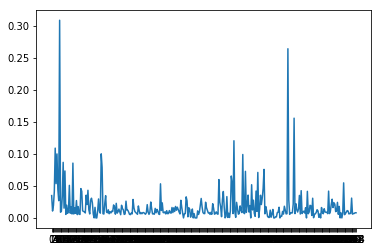

In [35]:
plt.plot(cmatrix.mean(axis=0)[:])

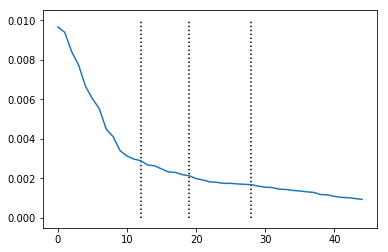

In [3]:
svd = TruncatedSVD(n_components=50)
svd.fit(cmatrix)
plt.plot(svd.explained_variance_ratio_[5:50])
plt.vlines([12,19,28],0,0.01,linestyle=":")

In [4]:
svd = TruncatedSVD(n_components=19)
Xsvd = svd.fit_transform(cmatrix)

In [162]:
silh = np.zeros(50)
for i in range(2,50,2):
    km = KMeans(i)
    y = km.fit_predict(Xsvd)
    silh[i] = silhouette_score(Xsvd,y,sample_size=10000)
    print(f"Done, {i}")

Done, 2
Done, 4
Done, 6
Done, 8
Done, 10
Done, 12
Done, 14
Done, 16
Done, 18
Done, 20
Done, 22
Done, 24
Done, 26
Done, 28
Done, 30
Done, 32
Done, 34
Done, 36
Done, 38
Done, 40
Done, 42
Done, 44
Done, 46
Done, 48


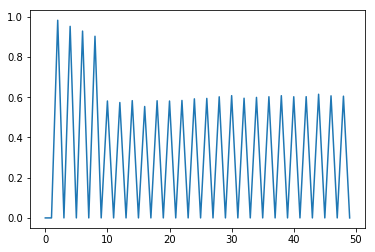

In [163]:
plt.plot(silh)

In [13]:
km = KMeans(20, random_state=12345)#20,16,12
y = km.fit_predict(Xsvd)

Removed biggest cluster: 9


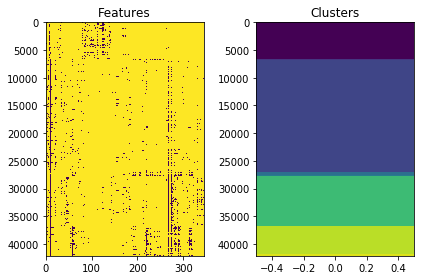

In [24]:
fig, ax = plt.subplots(1,2)
cmatrixImg = cmatrix==0
cmatrixImg['y'] = y
cmatrixImg = cmatrixImg.sort_values(by='y')
Xprint = cmatrixImg.drop(columns='y')
yprint = cmatrixImg['y']
u = yprint.value_counts().index[0]
print(f"Removed biggest cluster: {u}")
ax[0].imshow(Xprint.loc[yprint!=u,:],aspect='auto')
ax[1].imshow(yprint[yprint!=u, np.newaxis], aspect='auto')
ax[0].set_title("Features")
ax[1].set_title("Clusters")
plt.tight_layout()

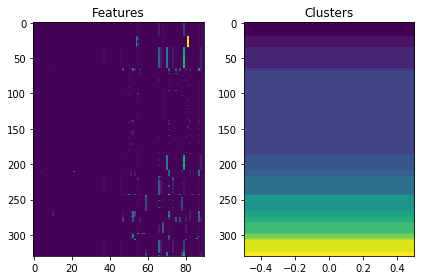

In [38]:
cmatrix_places = pd.read_csv(freqgraph_place_csv_path)
km = KMeans(20, random_state=12345)#20,16,12
yplaces = km.fit_predict(cmatrix_places)

cmatrixplacesImg = cmatrix_places
cmatrixplacesImg['y'] = yplaces
cmatrixplacesImg = cmatrixplacesImg.sort_values(by='y')
Xprint = cmatrixplacesImg.drop(columns='y')
yprint = cmatrixplacesImg['y']

fig, ax = plt.subplots(1,2)
ax[0].imshow(Xprint.loc[yprint!=u,:],aspect='auto')
ax[1].imshow(yprint[yprint!=u, np.newaxis], aspect='auto')
ax[0].set_title("Features")
ax[1].set_title("Clusters")
plt.tight_layout()

In [15]:
img_places = pd.read_csv(trainimage_place_csv_path)

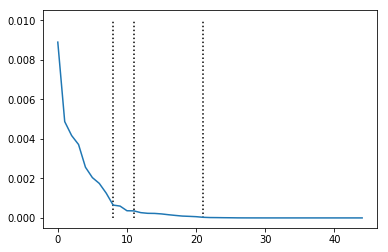

In [36]:
svd = TruncatedSVD(n_components=50)
svd.fit(img_places)
plt.plot(svd.explained_variance_ratio_[5:50])
plt.vlines([8,11,21],0,0.01,linestyle=":")

In [59]:
svd = TruncatedSVD(n_components=11)
Xplaces = svd.fit_transform(img_places)

In [73]:
silh = np.zeros(50)
for i in range(2,50,2):
    km = KMeans(i, random_state=12345)
    y = km.fit_predict(Xplaces)
    silh[i] = silhouette_score(Xplaces,y,sample_size=10000)
    print(f"Done, {i}")

Done, 2
Done, 4
Done, 6
Done, 8
Done, 10
Done, 12
Done, 14
Done, 16
Done, 18
Done, 20
Done, 22
Done, 24
Done, 26
Done, 28
Done, 30
Done, 32
Done, 34
Done, 36
Done, 38
Done, 40
Done, 42
Done, 44
Done, 46
Done, 48


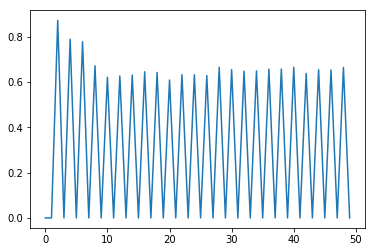

In [74]:
plt.plot(silh)

In [91]:
km = KMeans(6, random_state=12345)#20,16,12
yplaces = km.fit_predict(Xplaces)

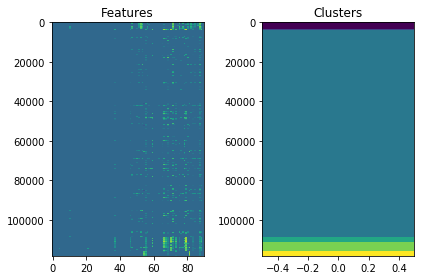

In [92]:
imgplacesImg = img_places
imgplacesImg['y'] = yplaces
imgplacesImg = imgplacesImg.sort_values(by='y')
Xprint = imgplacesImg.drop(columns='y')
yprint = imgplacesImg['y']

fig, ax = plt.subplots(1,2)
ax[0].imshow(np.log(1+Xprint),aspect='auto')
ax[1].imshow(yprint[:, np.newaxis], aspect='auto')
ax[0].set_title("Features")
ax[1].set_title("Clusters")
plt.tight_layout()

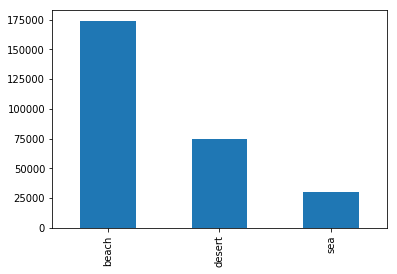

In [115]:
sel = imgplacesImg[imgplacesImg['y']==5].drop(columns='y').sum(axis=0)
#sel[sel!=0].plot(kind='bar')
sel.sort_values()[::-1][:3].plot(kind='bar')

No handles with labels found to put in legend.


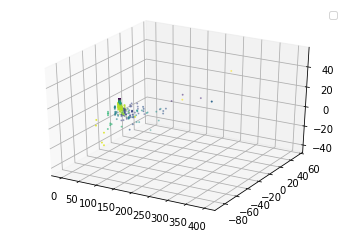

In [194]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xsvd[yprint>0,0],Xsvd[yprint>0,1],Xsvd[yprint>0,2], c=y[yprint>0], s=1)
plt.legend()